# Projet Machine Learning en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

# Introduction

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici : https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport :
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).

Pour cela nous allons commencer par une exploration des variables quantitatives et qualitatives. Ensuite nous passerons à la modélisation des variables à prédire.


In [73]:
# Chargement des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier



<h1 style="color:red">I)  Exploration des variables</h1>


### 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [2]:
# Lecture des données
path = ""
gym = pd.read_csv("gym_members_exercise_tracking.csv")

# Affichage des premières lignes
print("Aperçu des premières lignes du jeu de données:")
display(gym.head())  

# Résumé statistique
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  

Aperçu des premières lignes du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39



Résumé statistique du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.000000,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,NaN,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN
mean,38.683453,NaN,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,NaN,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,NaN,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,NaN,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,NaN,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,NaN,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,4.000000,2.000000,28.560000


On remarque que il y a plusieurs variables qualitatives : Gender, Workout_Type.
De même certaines variables ne prennent pas beaucoup de valeurs différentes donc il est intérréssant de les convertir en facteur : Experience_Level, Workout_Frequency..days.week.

Les autres variables sont des variables quantitatives que l'on transformera plus tard. 

In [3]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


In [4]:
# Nettoyage des noms de colonnes : suppression des unités entre parenthèses et espaces
gym.columns = (
    gym.columns
    .str.replace(r"\s*\(.*?\)", "", regex=True)  # Supprime tout ce qui est entre parenthèses
    .str.replace(" ", "_")                      # Remplace les espaces par des underscores
)


In [5]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake', 'Workout_Frequency', 'Experience_Level', 'BMI']


In [6]:
# Conversion des colonnes en types catégoriels
categorical_columns = [
    "Gender",
    "Workout_Type",
    "Experience_Level",
    "Workout_Frequency"
]

for col in categorical_columns:
    gym[col] = gym[col].astype("category")


### 2) Exploration par une analyse descriptive unidimensionnelle des données.

Conformément aux analyses faites sur le fichier R, nous transformons les variables Weight et BMI.

In [7]:
# Application du logarithme sur les colonnes 'Weight..kg.' et 'BMI'
gym["LWeight"] = np.log(gym["Weight"])
gym["LBMI"] = np.log(gym["BMI"])

# Supprimer les colonnes originales
gym.drop(columns=["Weight", "BMI"], inplace=True)

In [8]:
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  


Résumé statistique du jeu de données:


,Age,Gender,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,LWeight,LBMI
count,973.000000,973,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.0,973.0,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4.0,3.0,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,3.0,2.0,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,368.0,406.0,NaN,NaN
mean,38.683453,NaN,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,NaN,NaN,4.262981,3.180764
std,12.180928,NaN,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,NaN,NaN,0.277751,0.263097
min,18.000000,NaN,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,NaN,NaN,3.688879,2.511224
25%,28.000000,NaN,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,NaN,NaN,4.062166,3.001217
50%,40.000000,NaN,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,NaN,NaN,4.248495,3.184698
75%,49.000000,NaN,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,NaN,NaN,4.454347,3.352007


<h1 style="color:red">II- Prédiction des Calories Brulées</h1>


Nous considérons maintenant le problème de la prédiction la variable Calories_Burned à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent. 

## 2.1 Division du jeu de données en un échantillon d'apprentissage et un échantillon test
Nous divisons le jeu de données en un échantillon d’apprentissage et un échantillon test. Nous prenons un 
pourcentage de 20% pour l’échantillon test. 


In [9]:
#Variables qualitatives
qual_vars = gym.select_dtypes(include="category").columns.tolist()
gymDum = pd.get_dummies(gym[qual_vars], drop_first=True)
print(qual_vars)


['Gender', 'Workout_Type', 'Workout_Frequency', 'Experience_Level']


In [10]:
gymQuant=gym[['Age', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration',  'Fat_Percentage', 'Water_Intake',  'LWeight', 'LBMI']]
dfC=pd.concat([gymDum,gymQuant],axis=1)
dfC.head()

# variable à expliquer réelle
Yr=gym["Calories_Burned"]

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Yr_train, Yr_test = train_test_split(dfC, Yr, test_size=0.2, random_state=235)

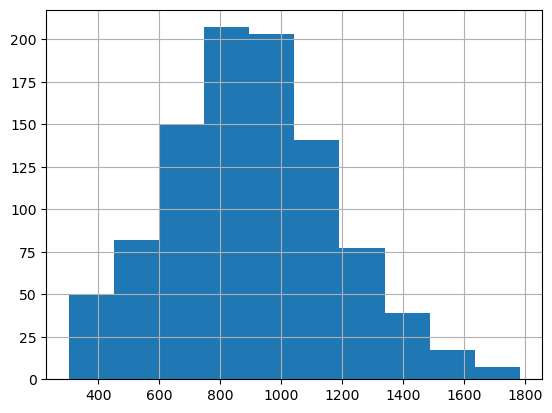

In [12]:
Yr.hist()
plt.show()

#### Normalisation des données

In [13]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme des réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

##  2.2 Modèle linéaire (généralisé) avec/sans sélection de variables, avec/sans pénalisation


faudrait faire avec ridge aussi si y'a le temps

### 2.2.1 Sélection de variable par régularisation L1 (LASSO)

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

MSE= 1438.8323559129446


In [15]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,prev))

R2= 0.9811799492144176


Le paramètre de pénalisation Lasso est optimisé par validation croisée ci dessous.

In [16]:
from sklearn.model_selection import GridSearchCV

# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.5,0.8,1,3, 3, 4.52]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)


# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.977778, Meilleur paramètre = {'alpha': 0.8}


In [17]:
# Résultats de prédiction sur l'échantillon de test
prev=regLassOpt.predict(Xr_test)
mse_mod_lin_lasso=mean_squared_error(prev,Yr_test)
r2_mod_lin_lasso=r2_score(Yr_test,prev)
print("MSE=", mse_mod_lin_lasso)
print("R2=",r2_mod_lin_lasso)

MSE= 1444.709428437311
R2= 0.9811030766010623


In [18]:
# Coefficients gardés par Lasso
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 11 variables et en supprime 8


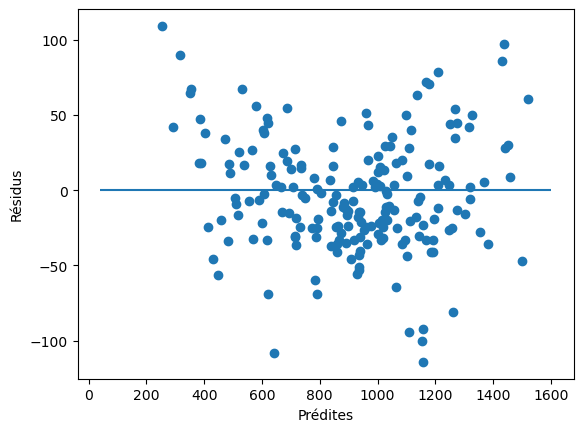

In [19]:
# Résidus sur l'échantillon de test
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

Text(0.5, 1.0, 'Coefficients du modèle lasso')

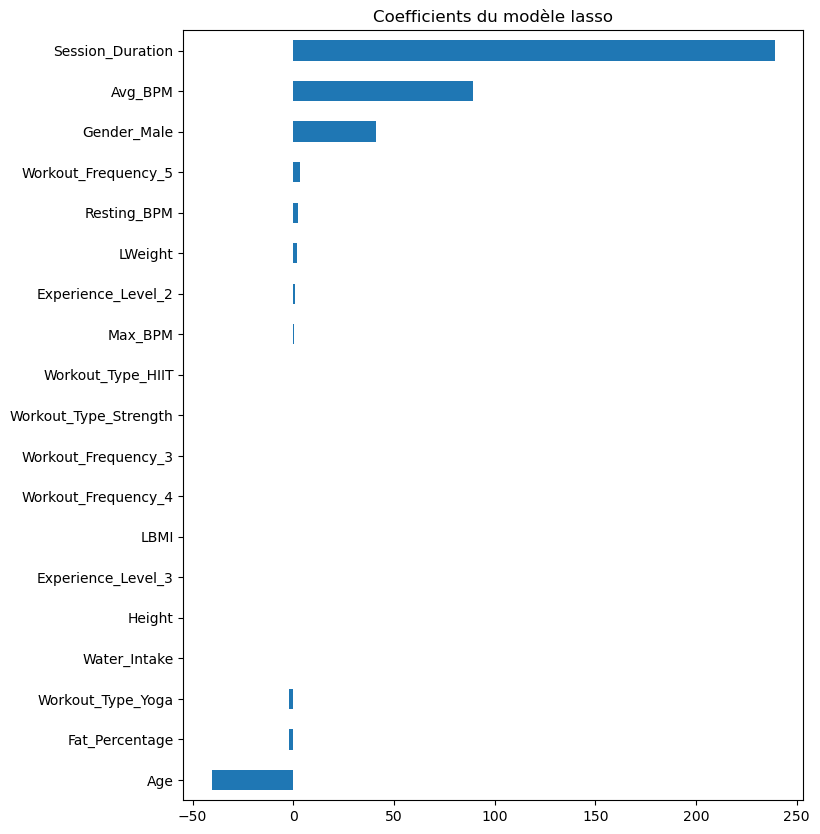

In [20]:
#Importance des paramètres
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients du modèle lasso")

Le lambda optimal (alpha) trouvé par Python correspond au lambda min trouvé en R. Toutefois, avec un même paramètre de régularisation, le code python de la prédiction de modèle linéaire a de meilleurs résultats que R.

## 2.3 Support Vector Regression(SVR)


### 2.3.1 Régression sur l'échantillon d'apprentissage

Nous nous interressons seulement au noyau gaussien. Nous estimons les paramètres optimaux par validation croisée.

In [21]:
from sklearn.svm import SVR

In [22]:

# Définition du modèle SVR et des hyperparamètres à tester
svr = SVR()
param_grid = {
    'C': [3.5,5, 8, 12, 20,50, 100, 120],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid Search avec validation croisée
grid_search = GridSearchCV(svr, param_grid, cv=10)
grid_search.fit(Xr_train, Yr_train)

# Meilleur modèle
best_svr = grid_search.best_estimator_
print("Meilleurs paramètres trouvés :", grid_search.best_params_)


Meilleurs paramètres trouvés : {'C': 120, 'gamma': 0.01}


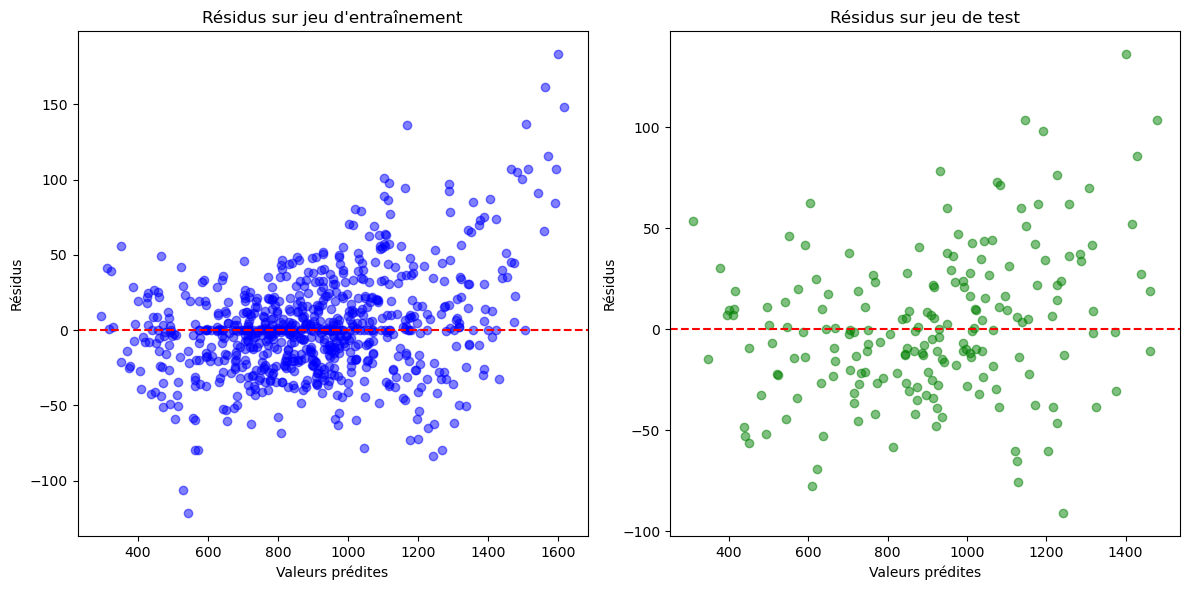

In [23]:
# Prédiction sur les jeux de données
Yr_train_pred = best_svr.predict(Xr_train)
Yr_test_pred = best_svr.predict(Xr_test)

# Calcul des résidus
residus_train = Yr_train - Yr_train_pred
residus_test = Yr_test - Yr_test_pred

# Tracé des résidus
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Yr_train_pred, residus_train, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu d'entraînement")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.subplot(1, 2, 2)
plt.scatter(Yr_test_pred, residus_test, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.tight_layout()
plt.show()

Nous allons maintenant tester sur l'échantillon de test.

In [26]:
# Résultats de prédiction sur l'échantillon de test

mse_svr=mean_squared_error(Yr_test_pred,Yr_test)
r2_svr=r2_score(Yr_test,Yr_test_pred)
print("MSE=", mse_mod_lin_lasso)
print("R2=",r2_mod_lin_lasso)

MSE= 1444.709428437311
R2= 0.9811030766010623


## Arbre Optimal

##### Graphe des résidus

### 2.4.2 Erreur de régression

## 2.5 Forêt aléatoire

### 2.5.1 Regression

### 2.5.2 Prévision de l'échantillon test

#### 2.5.3 Importance des variables

Commenter l'importance des variables .


## 2.6 Boosting

### 2.6.1 Régression

##### Calcul des résidus

### 2.6.2 Prévision de l'échantillon test, erreur de régression

Le boosting a de bonnes performances. L'erreur de prévision est similaire à celle des modèles linéaires. Toutefois, son temps de calcul est plus long et son interprétabilité plus faible.

## 2.7 Réseau de neurones

### 2.7.1 Régression

Size définit le nombre de neurones dans la couche cachée. Plus size est grand, plus le réseau a de capacité à apprendre des relations complexes (modèle plus puissant). Decay est le coefficient de régularisation L2 (penalisation des poids). Nous cherchons les paramètres optimaux grâce à la fonction Tune.nnet.

Les résidus sont bien aléatoires et independants.

### 2.7.2 Prévision de l'échantillon test, erreur de régression

La MSE du réseaux de neurones est similaire à celle des modèles linéaires (environ 1500). Il est important de noter que le tuning des paramètres pour le réseau de neurones est assez long et très couteux. De plus, nous observons une certaine variabilité des résultats due à l'initialisation àléatoire. Ici d'autres paramètres sont peut-être plus optimaux mais le coût de calcul pour leur recherche est conséquent et les résultats sont variables. 

## 2.8 Comparaison finale des différents modèles

Finalement, voici les résultats des différents modèles sur l'échantillon test. Pour des raisons d'explicabilité et d'interprétation des résultats nous affichons la RMSE et non la MSE car la RMSE est dans la même unité que "Calories_Burned", soit en calories.

In [25]:
cat("RMSE RdN :",sqrt(erreur_RDN),"\n")
cat("RMSE Boosting :",sqrt(erreur_boosting),"\n")
cat("RMSE Foret aléatoire :" ,sqrt(erreur_randomforest),"\n")
cat("RMSE Arbre optimal :",sqrt(erreur_arbreoptimal) ,"\n")
cat("RMSE pour un SVR avec noyau radial :",sqrt(erreur_SVR) , "\n")
cat("RMSE Modèle linéaire Lasso avec lambda.min :", sqrt(mse.lasso.min), "\n")
cat("RMSE Modèle linéaire  Lasso avec lambda.1se :", sqrt(mse.lasso.1se), "\n")
cat("RMSE modèle linéaire sans sélection de variable :", sqrt(mse.lm), "\n")


SyntaxError: invalid decimal literal (3231204663.py, line 7)

##### Quels sont les modèles les plus performants ? Quel est le niveau de précision obtenu ? Quels modèles retenir si l’on ajoute une contrainte d’interprétabilité ?

SVR avec un noyau radial est le modèle le plus performant avec une RMSE égale à 30. Ainsi, lors de la prédiction du nombre Il est suivi par le modèle par boosting avec une RMSE égale à 39.

Or, SVR, Boosting, Réseaux de neurones ont un niveau d'interprétabilité très faible.

Donc si on rajoute une contrainte d'interprétabilité, les modèles linéaires sont les plus pertinents. Le modèle avec sélection de variables LASSO avec lambda.min semble être le meilleur compromis avec une MSE égale à 2007.

##### Retour sur l'analyse de données

vos résultats sont-ils cohérents avec l’analyse exploratoire des données, par exemple en ce qui concerne l’importance des variables ?

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles linéaires avec sélection de variable et l'arbre optimal ont confirmé nos analyses sur la grande importance de la variable "Durée de la session". Nous avons également retrouvé l'importance du genre dans la sélection des variables des modèles linéaires. Toutefois, nous n'avions pas trouvé grande importance à la variable "Avg_BPM" dans notre analyse exploratoire alors que les modèles de prédiction ont mis en avant cette variable.

<h1 style="color:red">III- Prédiction du niveau d'expérience</h1>


In [30]:
GymDum=pd.get_dummies(gym[["Gender","Workout_Type","Experience_Level","Workout_Frequency"]])
GymDum = GymDum.drop(columns=["Workout_Type_Cardio","Workout_Frequency_2"])


GymDum2=pd.get_dummies(gym[["Gender","Workout_Type","Workout_Frequency"]])
GymDum2 = GymDum2.drop(columns=["Workout_Type_Cardio","Workout_Frequency_2"])


Y1=GymDum["Experience_Level_1"]
Y2=GymDum["Experience_Level_2"]
Y3=GymDum["Experience_Level_3"]

Yb=gym["Experience_Level"]

Y1.head()

0    False
1    False
2    False
3     True
4     True
Name: Experience_Level_1, dtype: bool

In [34]:
dfC2=pd.concat([GymDum,gymQuant],axis=1)
dfC2=dfC2.drop(columns=["Experience_Level_1","Experience_Level_2", "Experience_Level_3"]) 

dfC3=pd.concat([GymDum2,gymQuant],axis=1)

dfC2.head()

,Gender_Female,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency_3,Workout_Frequency_4,Workout_Frequency_5,Age,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Fat_Percentage,Water_Intake,LWeight,LBMI
0,False,True,False,False,True,False,True,False,56,1.71,180,157,60,1.69,12.6,3.5,4.480740,3.407842
1,True,False,True,False,False,False,True,False,46,1.53,179,151,66,1.30,33.9,2.1,4.316154,3.465736
2,True,False,False,False,False,False,True,False,32,1.66,167,122,54,1.11,33.4,2.3,4.220977,3.207208
3,False,True,False,True,False,True,False,False,25,1.70,190,164,56,0.59,28.8,2.1,3.974058,2.912894
4,False,True,False,True,False,True,False,False,38,1.79,188,158,68,0.64,29.2,2.8,3.830813,2.666534


### Séparation des échantillons en train et test

In [35]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(dfC2,Y1,test_size=0.2,random_state=17)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(dfC2,Y2,test_size=0.2,random_state=17)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(dfC2,Y3,test_size=0.2,random_state=17)
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC3,Yb,test_size=0.2,random_state=17)

Normalisons ensuite les données, ce qui est nécessaire pour certains modèles.

In [37]:
scaler = StandardScaler()  
scaler.fit(X1_train)  
scaler.fit(X2_train)  
scaler.fit(X3_train)  
scaler.fit(X_train)  

Xb1_train = scaler.fit_transform(X1_train)  
Xb1_test = scaler.transform(X1_test)
Xb2_train = scaler.fit_transform(X2_train)  
Xb2_test = scaler.transform(X2_test)
Xb3_train = scaler.fit_transform(X3_train)  
Xb3_test = scaler.transform(X3_test)
Xb_train = scaler.fit_transform(X_train)  
Xb_test = scaler.transform(X_test)

## Modèle linéaire

### Regression logistique

La regression logistique s'applique normalement à de la classification binaire donc on doit séparer en trois prédictions.

faire la reg logistique comme en R et afficher l'importance des variables. attention à bien faire de la validation croisée.

## SVM

In [51]:
from sklearn.svm import SVC

In [43]:
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4,2,2.5]}]
svm= GridSearchCV(SVC(probability=True),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xb_train, Yb_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.123377, Meilleur paramètre = {'C': 1.4}


#### Erreur sur l'échantillon de test

In [47]:
# erreur de prévision sur le test
precision_SVM=svmOpt.score(Xb_test,Yb_test)
1-precision_SVM

0.1282051282051282

In [53]:
# prévision de l'échantillon test
y_pred_test = svmOpt.predict(Xb_test)
# matrice de confusion
table=pd.crosstab(y_pred_test ,Yb_test)
print("Matrice de confusion: ")
print(table)

print("")
print("")

print("Rapport de classification: ")
print(classification_report(Yb_test, y_pred_test))

Matrice de confusion: 
Experience_Level   1   2   3
row_0                       
1                 57   9   0
2                 16  85   0
3                  0   0  28


Rapport de classification: 
              precision    recall  f1-score   support

           1       0.86      0.78      0.82        73
           2       0.84      0.90      0.87        94
           3       1.00      1.00      1.00        28

    accuracy                           0.87       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.87      0.87      0.87       195



A voir si on se casse la tête a tracer les ROC, est ce que y'a une méthode facile pour les tracer avec 3 classes ?

## Arbre optimal

In [57]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,12))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xb_train, Yb_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))


Meilleur score = 0.091292, Meilleur paramètre = {'max_depth': 4}


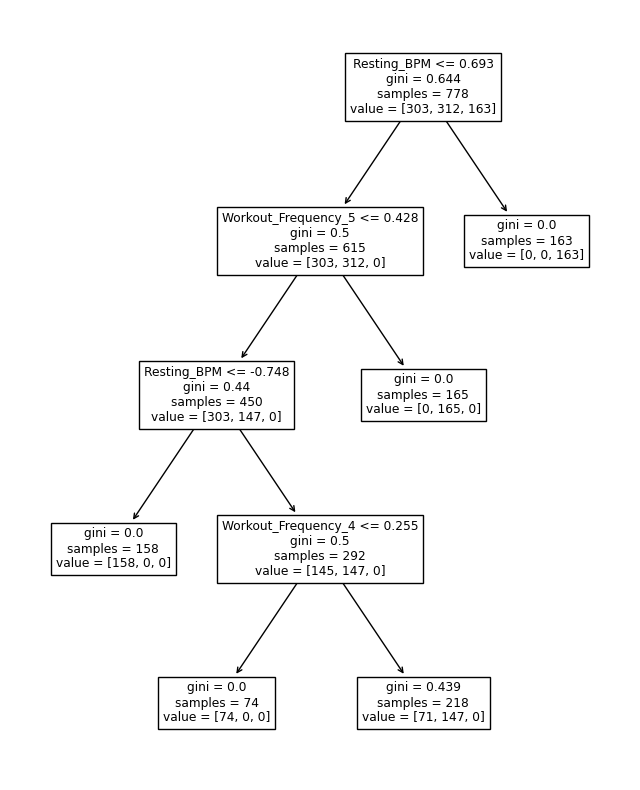

In [67]:
best_tree=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
best_tree.fit(Xb_train,Yb_train)
plot_tree(best_tree,feature_names=dfC.columns.tolist());
plt.show()

In [59]:
# Estimation de l'erreur de prévision
precision_CART=treeOpt.score(Xb_test,Yb_test)
1-precision_CART

0.11794871794871797

In [70]:
# prévision de l'échantillon test
y_pred_test_CART = treeOpt.predict(Xb_test)

# matrice de confusion
print("Matrice de confusion CART : ")
table=pd.crosstab(y_pred_test_CART,Yb_test)
print((pd.DataFrame(table)))

print("")
print("")

print("Rapport de classification CART : ")
print(classification_report(Yb_test, y_pred_test_CART))

Matrice de confusion CART : 
Experience_Level   1   2   3
row_0                       
1                 50   0   0
2                 23  94   0
3                  0   0  28


Rapport de classification CART : 
              precision    recall  f1-score   support

           1       1.00      0.68      0.81        73
           2       0.80      1.00      0.89        94
           3       1.00      1.00      1.00        28

    accuracy                           0.88       195
   macro avg       0.93      0.89      0.90       195
weighted avg       0.91      0.88      0.88       195



## Forêt Aléatoire

In [74]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xb_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.096419, Meilleur paramètre = {'max_features': 9}


#### Erreur de prévision sur le test

In [75]:
# erreur de prévision sur le test
precision_RandomForest=rfOpt.score(Xb_test,Yb_test)

In [77]:
# prévision
y_pred_rf = rfOpt.predict(Xb_test)
# matrice de confusion
print("Matrice de confusion: ")
table=pd.crosstab(y_pred_rf,Yb_test)
print(table)

print("")
print("")

print("Rapport de classification: ")
print(classification_report(Yb_test, y_pred_rf))

Matrice de confusion: 
Experience_Level   1   2   3
row_0                       
1                 55  11   0
2                 18  83   0
3                  0   0  28


Rapport de classification: 
              precision    recall  f1-score   support

           1       0.83      0.75      0.79        73
           2       0.82      0.88      0.85        94
           3       1.00      1.00      1.00        28

    accuracy                           0.85       195
   macro avg       0.89      0.88      0.88       195
weighted avg       0.85      0.85      0.85       195



+ afficher les 3 roc

## Boosting

## RDN

## Comparaison des differents modèles (Courbes ROC+AUC, score F1, precision)